# Université de Limoges
*December 2023*

Faculté des Sciences et Techniques

Département de Mathématiques

# ===============================================================

## =========Master de Mathématiques et applications, parcours ACSYON==========
### ======================Splitting Methods for Convex Optimization===============================
#### ============================================ Homework 3=========================================================

### ===========================Cleque Marlain MBOULOU======================================


In [2]:
import numpy as np
from numpy.linalg import inv,norm,svd,matrix_rank,eig
import matplotlib.pyplot as plt



# Part 1: Compressed sensing and cardinality minimization problems

$\textbf{1. }$  **Problem** $(Q_1)$ **is not a convex minimization problem**

The cardinality function $||\cdot ||_0$ is not convex. To prove this, consider two vectors $x, y \in \mathbb{R}^d$ such that $x = (1, 0)$ and $y = (0, 1)$. Now, consider $z = \frac{1}{2}(x + y) = (\frac{1}{2}, \frac{1}{2})$. The cardinality of $x$ and $y$ is 1, but the cardinality of $z$ is 2, violating the convexity property ($||\frac{1}{2}x + \frac{1}{2}y||_0\le \frac{1}{2}||x||_0 + \frac{1}{2}||y||_0$ .

###### $\textbf{2. The convex envelop of the cardinality function}$
$\textbf{a. }$
Given $y\in\mathbb{R}^d$ and $x\in \overline{B}_\infty$

Let's prove that: $<y, x> - ||x||_0 \leq \sum_{i: x_i \neq 0} (|y_i| - 1) \leq \sum_{i=1}^d (|y_i| - 1)^+$.

Firstly: $||x||_0 = \sum_{x_i\ne 0} 1$

Secondly: $<y,x> = \sum_{i =1}^d y_ix_i \le \sum_{i =1}^d |y_i|*|x_i| \le \sum_{x_i\ne 0} |y_i|* ||x||_\infty \le \sum_{x_i\ne 0} |y_i|$, because $|x_i|\le||x||_\infty$ ($x\in \overline{B}_\infty$)

Then : $<y,x> - ||x||_0\le \sum_{x_i\ne 0} (|y_i| - 1)$ and it is natural that $\sum_{x_i\ne 0} (|y_i| - 1)\le \sum_{i=0}^d (|y_i| - 1)^+$



$\textbf{b. }$ Now, let's deduce $g^*(y)$ using the result above.

$$
g^*(y) = \sup_{x \in \mathbb{R}^d} (\langle y, x \rangle - \|x\|_0 -i_{\overline{B}_\infty}(x)) =  \sup_{x \in \overline{B}_\infty} (\langle y, x \rangle - \|x\|_0) \leq \sup_{x \in \overline{B}_\infty} \sum_{i=1}^d (|y_i| - 1) = \sum_{i=1}^d (|y_i| - 1)^+
$$

Then :  $ g^*(y) = \sum_{i=1}^d (|y_i| - 1)^+ $ 


$\textbf{c. } $ Let's prove that $y\in\mathbb{R}^d$ and $x\in \overline{B}_\infty$, $\langle x, y\rangle - g^*(y) \leq \sum_{|y_i|<1} |x_i| + \sum_{|y_i|>1} (|y_i|(|x_i| - 1) + 1) \leq || x ||_1$.

$\langle x,y \rangle - g^*(y) = \sum_{i =1}^d (y_ix_i  - (|y_i| - 1)^+) \le \sum_{i =1}^d (|y_i|* |x_i|  - (|y_i| - 1)^+)$



Then : $\langle x,y \rangle - g^*(y) \le \sum_{|y_i|<1} (|y_i|* |x_i|  - (|y_i| - 1)^+) + \sum_{|y_i|\ge 1} (|y_i|* |x_i|  - (|y_i| - 1)^+)$

   
 - When $|y_i|<1$,  $ (|y_i| - 1)^+ = 0  \texttt{ and } |y_i|* |x_i| \le |x_i| $
 - When $|y_i|\ge1$,  $ (|y_i| - 1)^+ = |y_i| - 1 $
 
 Then : $\langle x,y \rangle - g^*(y) \le \sum_{|y_i|<1}  |x_i|  + \sum_{|y_i|\ge 1} (|y_i|(|x_i| - 1) + 1))$
 
 - When $|y_i|\ge1$, $|y_i|(|x_i| - 1)\le |x_i| $ because $ |x_i| - 1 \le 0$, 
      - Then $\sum_{|y_i|\ge 1} (|y_i|(|x_i| - 1) + 1))\le \sum_{|y_i|\ge 1} |x_i|$
      
 Then : $\langle x,y \rangle - g^*(y) \le \sum_{|y_i|<1} (|y_i|* |x_i|  - (|y_i| - 1)^+) + \sum_{|y_i|\ge 1} (|y_i|* |x_i|  - (|y_i| - 1)^+)\le \sum_{|y_i|<1}  |x_i| + \sum_{|y_i|\ge 1} |x_i| = ||x||_1$
 
 $\textbf{d. }$ Let's deduce that $\forall x \in \overline{B}_\infty$, $(g^*)^*(x) = ||x||_1$
 
 If $ x \setminus \overline{B}_\infty$
 
 $$
g^{**}(x) = \sup_{y \in \mathbb{R}^d} (\langle y, x \rangle - g^{*}(y))
$$
By the previous question : $\langle x,y \rangle - g^*(y) \le ||x||_1$

Then: $g^{**}(x) = ||x||_1$

$\textbf{e. }$Let's prove that $\forall x \in \mathbb{R}^d \setminus \overline{B}_\infty$, $g^{**}(x) = +\infty$.

if $ x \in \mathbb{R}^d \setminus \overline{B}_\infty$, 

$g^{**}(x) = \sup_{y \in \mathbb{R}^d} (\langle y, x \rangle - g^{*}(y)) $

Because $i_{B_\infty}(x) = \infty$, we have: $$g^{**}(x) =  \sup_{x \in \mathbb{R}^d} (\langle y, x \rangle - \|x\|_0 -i_{\overline{B}_\infty}(x)) = - \infty $$

Then $g^{**}(x) = +\infty$

$\textbf{f. }$ Let's deduce that $g^{**} = ||\cdot ||_1 + i_{\overline{B}_\infty}$.

$g^{**}(x) = \begin{equation}
\left\{
\begin{aligned}
   ||x||_1 \texttt{ if } x \in\overline{B}_\infty\\
   \infty \texttt{ if } x \in \mathbb{R}^d \setminus \overline{B}_\infty \\
\end{aligned}
\right.
\end{equation}
$

Then, $ g^{**}(x) = ||x||_1 + i_{\overline{B}_\infty}(x)$

$\textbf{g.}$  Let's using the biconjugate theorem, deduce that $|| \cdot ||_1$ is the affine hull of $|| \cdot ||_0$ over $\overline{B}_\infty$.

By biconjugate theorem, $ g^{**} = \texttt{Aff}(g)$, then $ \texttt{Aff}(\|\cdot\|_0 +i_{\overline{B}_\infty}) = ||\cdot ||_1 + i_{\overline{B}_\infty} $


$\textbf{f. }$Let's deduce that $ \frac{1}{M} || \cdot ||_1$ is the affine hull of $|| \cdot ||_0$ over the ball $\overline{B}_M^\infty := M\overline{B}_\infty$ for any $M > 0$

- By scaling, $\frac{1}{M} \| \cdot \|_1$ is equivalent to $ \| \cdot \|_1$ over $B_\infty$.
- Thus, $\frac{1}{M} \| \cdot \|_1$ is the affine hull of $\| \cdot \|_0$ over $B_\infty$.
- The ball $MB_\infty$ is obtained by scaling $B_\infty$ by a factor of $M$, and this scaling operation preserves the affine hull relationship.
- Therefore, $\frac{1}{M} \| \cdot \|_1$ is the affine hull of $\| \cdot \|_0$ over the ball $MB_\infty$.



$\textbf{3. Several approximations and simplifications of Problem}$

- $\textbf{Objective of Problems}$

   - $\textbf{Basis Pursuit Problem}$ ($Q_2$):
        $$
        \min_{x\in\mathbb{R}^d} \|x\|_1 \text{ subject to } Ax = b.
        $$

   - $\textbf{Relaxed Problem with Measurement Error}$ ($Q_3$):
        $$
        \min_{x\in\mathbb{R}^d} \|x\|_1 \text{ subject to } \|Ax - b\|_2 \leq \theta, \quad \theta > 0.
        $$

   -  $\textbf{Regularized Problem } (Q_4)$
        $$
        \min_{x\in\mathbb{R}^d} \mu \|x\|_1 + \frac{1}{2} \|Ax - b\|_2^2, \quad \mu > 0.
        $$


-  $\textbf{Discussion on Relationships}$


   - $\textbf{Any Solution to Q4 is a Solution to } Q_3$

        $\textbf{*}$ Suppose $x^*$ is a solution to $Q_4$, i.e., $\mu \|x^*\|_1 + \frac{1}{2} \|Ax^* - b\|_2^2$ is minimized.
        
         
        $\textbf{°}$ The constraint in $Q_3$ is $\|Ax - b\|_2 \leq \theta$, and if $x^*$ minimizes the regularization term in $Q_4$, it also satisfies the constraint in $Q_3$.
        
        $\textbf{°}$ Therefore, $x^*$ is a solution to $Q_3$.


   - $\textbf{Relationship between}$ $Q_3$ and $Q_4:$
   
       - $Q_4$ combines $\ell_1$-norm minimization with a quadratic data fidelity term, providing a balance between sparsity and data fidelity.
       
       - By appropriately choosing the parameter $\mu$, $Q_4$ can be adjusted to behave similarly to $Q_3$. If $\mu$ is large, the $\ell_1$-norm dominates, resembling $Q_3$.
       
       - The choice of $\theta$ in $Q_3$ controls the level of allowed measurement error.

   -  $\textbf{Additional Considerations:}$
       - The choice of parameters ($\theta$ and $\mu$) depends on the characteristics of the data and the noise level.
       - Adding additional hypotheses may involve assumptions about the structure of the solution, noise model, or sparsity pattern.


$\textbf{4.a}$  Augmented Lagrangian $L_\lambda$

For some $\lambda > 0$, the augmented Lagrangian $L^\lambda$ associated with Problem $Q_5$ is given by:
$$
L^\lambda(x, y, z) = \mu \|y\|_1 + \frac{1}{2} \|Ax - b\|_2^2 +\langle z,x-y \rangle+ \frac{\lambda}{2} \|x - y\|_2^2
$$

- $\textbf{ADMM Algorithm Steps:}$

The ADMM algorithm for Problem $Q_5$ is decomposed into three steps:

$\textbf{ Update } x:$
$$
x_{k+1} = \arg\min_{x\in\mathbb{R}^d} L^\lambda(x, y_k, z_k)
$$

$\textbf{ Update } y:$
$$
y_{k+1} = \arg\min_{y\in\mathbb{R}^d} L^\lambda(x_{k+1}, y, z_k)
$$

$\textbf{ Update } z :$
$$
z_{k+1} = z_k + \lambda(x_{k+1} - y_{k+1})
$$


$\textbf{b. }$
The solution $x_{k+1}$ to the first step of the ADMM algorithm for Problem $Q5$ is given by :
$$ x_{k+1} = \arg\min_{x\in\mathbb{R}^d} L^\lambda(x, y_k, z_k) $$
is unique because the objectif function is  strongly convex in relation to the $x$

The objective is to minimize the augmented Lagrangian $L^\lambda(x, y_k, z_k)$:
$$ L^\lambda(x, y, z) = \mu \|y\|_1 + \frac{1}{2} \|Ax - b\|_2^2 +\langle z,x-y \rangle +\frac{\lambda}{2} \|x - y\|_2^2$$

The solution to the minimization problem is obtained by setting the gradient of $L^\lambda$ with respect to $x$ to zero:
$$ \nabla_x L^\lambda(x_{k+1}, y_k, z_k) = 0 $$

Now, we can compute the gradient:
$$ \nabla_x L^\lambda(x, y, z) = A^T(Ax - b) + \lambda(x - y_k + \frac{1}{\lambda}z_k) $$

Setting this to zero and solving for $x$ gives:
$$ (A^Tx + \lambda I_d)x -A^Tb+ \lambda(-y_k +\frac{1}{\lambda} z_k) = 0 $$

Rearranging terms and solving for $x_{k+1}$, we get:
$$ x_{k+1} = (\lambda I_d + A^TA)^{-1} (A^Tb + \lambda y_k - z_k)$$

Therefore, the unique solution to the first step of the ADMM algorithm is as claimed.

$\textbf{c. }$ 


$$ y_{k+1} = \arg\min_{y\in\mathbb{R}^d} (L^\lambda(x_{k+1}, y, z_k) = \mu \|y\|_1 + \frac{1}{2} \|Ax_{k+1} - b\|_2^2 +\langle z_k,x_{k+1}-y \rangle +\frac{\lambda}{2} \|x_{k+1} - y\|_2^2) $$


because $\frac{1}{2} \|Ax_{k+1} - b\|_2^2$ doesn't depend of $y$:


$\begin{aligned}
     y_{k+1} &= \arg\min_{y\in\mathbb{R}^d} \mu \|y\|_1 -\langle    z_k,y \rangle +\frac{\lambda}{2} \|x_{k+1} - y\|_2^2)\\
   y_{k+1} &= \arg\min_{y\in\mathbb{R}^d} \mu \|y\|_1 -\langle z_k,y \rangle +\frac{\lambda}{2} \|x_{k+1} + \frac{1}{\lambda}z_k - y\|_2^2) - \frac{1}{2\lambda}\|z_k\|^2 + \langle z_k,y \rangle\\
  y_{k+1} &=  \arg\min_{y\in\mathbb{R}^d} \mu \|y\|_1 +\frac{\lambda}{2} \|x_{k+1} + \frac{1}{\lambda}z_k - y\|_2^2)  = \arg\min_{y\in\mathbb{R}^d} \frac{\mu}{\lambda} \|y\|_1 +\frac{1}{2} \|x_{k+1} + \frac{1}{\lambda}z_k - y\|_2^2)\\
\end{aligned}$



Let $f(y) = \frac{\mu}{\lambda}\|y\|_1 $

Then we can recognise $\texttt{prox}_f(x_{k+1}+\frac{1}{\lambda}z_k) = \arg\min_{y\in\mathbb{R}^d} (f(y)+ \frac{1}{2} \|y - (x_{k+1} + z_k)  \|_2^2)$ where $f\equiv  \frac{\mu}{\lambda}||\cdot||_1$

Then $y_{k+1}=\texttt{prox}_{\frac{\mu}{\lambda}||\cdot||_1}(x_{k+1}+ \frac{1}{\lambda}z_k)$

$\textbf{5.}$ Code

$\texttt{prox}_{\frac{\mu}{\lambda}||\cdot||_1}(v_i) = \begin{equation}
\left\{
\begin{aligned}
   v_i + \frac{\mu}{\lambda} \texttt{ if } v_i\le -\frac{\mu}{\lambda}\\
   0 \texttt{ if } |v_i| \le \frac{\mu}{\lambda} \\
   v_i - \frac{\mu}{\lambda}\texttt{ if } v_i\ge \frac{\mu}{\lambda}
\end{aligned}
\right.
\end{equation}
$


In [62]:
def norme1(x):
    return sum(abs(x[i]) for i in range(len(x)))
def h(A,b,x,mu):
    return (mu*norme1(x)+ 1/2*norm(A@x-b))[0]
# Compute th prox of function f given mu and lambda and x
def proxy(x,mu,lamda):
    gamma = mu/lamda
    prox = np.zeros(x.shape)
    for i in range (len(x)):
        if x[i]<= -gamma:
            prox[i] = x[i] + gamma
        elif abs(x[i])<= gamma:
            prox[i] = 0
        else:
            prox[i] = x[i] - gamma
    return prox
def ADMM(A,b,lamda,mu,ITER = 100):
    start_time = time.time()
    m,n = A.shape
    I = np.identity(n)
    y = np.random.randn(n,1)
    z = np.random.randn(n,1)
    B = inv(lamda*I + A.T@A)
    Ab = A.T@b
    hh = []
    for i in range(ITER):
        x =  B@(Ab +lamda*y-z)
        y = proxy(x + 1/lamda*z,mu,lamda)
        z = z + lamda*(x - y)
        hh.append(h(A,b,x,mu))
    
    end_time = time.time()
    elapsed_time = end_time - start_time 
    return hh,x,elapsed_time

In [18]:
m = 5
n = 100
A = np.random.randint(-100,100,(m,n))
b = np.random.randint(-100,100,(m,1))

(5, 100)


******************************
ADMM algorithm
elapsed_time:  0.6283488273620605 seconds
ℎ(𝑥0) =  39410.68449430421
ℎ(𝑥*) =  0.6428176895581184
******************************


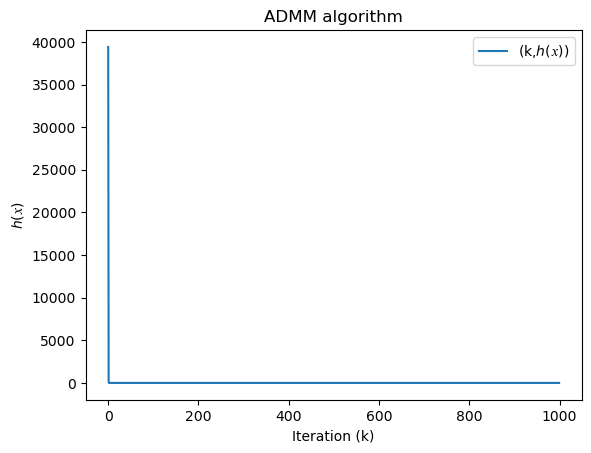

In [63]:
import time as time
mu = 0.5
lamda=0.001
ITER = 1000
hh,x_,times = ADMM(A,b,lamda,mu,ITER)
print("*" * 30)
print("ADMM algorithm")
print("elapsed_time: ",times,"seconds")
print("ℎ(𝑥0) = ",hh[0])
print("ℎ(𝑥*) = ",hh[-1])
print("*" * 30)
plt.plot(hh, label='(k,ℎ($𝑥$))')
plt.title("ADMM algorithm")
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()

# Part 2:Going back to the low-rank nonnegative matrix completion problem

$\textbf{1. SVD theorem}$


Recall that $X^TX$ is positive semi-definite and symmetric. Using the spectral theorem, we can write $X^TX = V^X\Sigma^2(V^{X})^T$ with $V^X$ orthogonal and $\Sigma$ diagonal. 
Let $X^TX = (V_1^X \, V_2^X) 
\begin{pmatrix} 
\Sigma_1^2 & 0 \\ 
0 & 0 \end{pmatrix}\begin{pmatrix} (V_1^X)^T \\ (V_2^X)^T\end{pmatrix}$
with $\Sigma_1 \in \mathbb{R}^{r \times r}$ having strictly positive entries, where $r$ is the rank of $X^TX$. It follows that $X^TX = V_1^X \Sigma_1^2 (V_1^X)^T$. Let $U_1^X = XV_1^X\Sigma_1^{-1}$. We have to prove:


- i)$(U_1^X)^TU_1^X = I$
- ii)$(U_1^X)^TXV_1^X = \Sigma_1$

For (i), we have:

$
\begin{align*}
    (U_1^X)^TU_1^X &= \Sigma_1^{-1}(V_1^X)^TX^TXV_1^X\Sigma_1^{-1} \\
    &= \Sigma_1^{-1}(V_1^X)^TV_1^X\Sigma_1^2(V_1^X)^TV_1X\Sigma_1^{-1} \\
    &= \Sigma_1^{-1}(V_1^X)^TV_1^X\Sigma_1^{-1} \\
    &= I
\end{align*}
$

(ii) simply follows from the equality $(U_1^X)^TXV_1^X = \Sigma_1^{-1}(V_1^X)^TX^TXV_1^X = \Sigma_1^{-1}(V_1^X)^TV_1^X\Sigma_1^(2V_1^X)^TV_1^X = \Sigma_1$.

Now we define $U_2^X \in \mathbb{R}^{m \times (m-r)}$ orthogonal such that $\text{Range}(U_2^X) = \text{Range}(U_1^X)^\perp$ and let $U = (U_1^X \, U_2^X) \in \mathbb{R}^{m \times m}$. Observe that $U^X$ is orthogonal by construction. 

We have
$$(U^X)^TXV^X = \begin{pmatrix} (U_1^X)^TXV_1^X & (U_1^X)^TXV_2^X \\ (U_2^X)^TXV_1^X & (U_2^X)^TXV_2^X \end{pmatrix}.$$

By (ii), we already know that the top-left block is equal to $\Sigma_1$. Since $V^X$ is orthogonal, for any column $v_2^X$ of $V_2^X$, $(V_1^X)^Tv_2^X = 0$ and $X^TXv_2^X = V_1^X\Sigma^2(V_1^X)^Tv_2^X = 0$. Hence, $(v_2^X)^TX^TXv_2^X = \lVert Xv_2^X
\rVert_2^2 = 0$, which is equivalent to $Xv_2^X = 0$. Therefore, the two blocks in the second column are both zeros. It remains to show that $(U_2^X)^TXV_1^X = 0$, which follows from the fact that $(U_2^X)^TU_1^X = 0 = (U_2^X)^TXV_1^X\Sigma_1^{-1}$ and since $\Sigma_1^{-1}$ is an invertible matrix.

In conclusion, we have $(U^X)^TXV^X = \begin{pmatrix} \Sigma_1 & 0 \\ 0 & 0 \end{pmatrix} =\Sigma^X.$

The columns of $V^X$ (respectively $U^X$) contain the eigenvectors of $X^TX$ (respectively $XX^T$), also called the left (respectively right) singular vectors.

- $\textbf{Example}$
Consider the matrix
$$
X = \begin{pmatrix}
  3 & 0 \\
  4 & 5
\end{pmatrix}
$$

To find the Singular Value Decomposition (SVD) of $X$, we perform the following steps:

1. Find the eigenvalues and eigenvectors of $X^T X$ and $X X^T$.
2. The singular values ($\sigma_i$) are the square roots of the eigenvalues of $X^T X$ (or $X X^T$).
3. Normalize the eigenvectors to form $U^X$ and $V^X$.

Let
$$
X^T X = \begin{pmatrix}
  25 & 20 \\
  20 & 25
\end{pmatrix}
\quad \text{and} \quad
X X^T = \begin{pmatrix}
  9 & 12 \\
  12 & 41
\end{pmatrix}
$$


The eigenvalues are $\lambda_1 = 45$ and $\lambda_2 = 5$. The corresponding eigenvectors can be normalized to form $U^X$) and $V^X$.

$$
U^X = \frac{1}{\sqrt{10}}\begin{pmatrix}
  1 & -3 \\
  3 & 1
\end{pmatrix}
\quad \text{and} \quad
V^X = \frac{1}{\sqrt{2}}\begin{pmatrix}
  1 & -1 \\
  1 & 1
\end{pmatrix}
$$

The singular values are $\sigma_1 = \sqrt{45}$ and $\sigma_2 = \sqrt{5}$ The SVD is then:

$$
X = U^X \Sigma^X (V^X)^T
$$

$$X =\begin{pmatrix}
  3 & 0 \\
  4 & 5
\end{pmatrix} =
\frac{1}{\sqrt{20}}\begin{pmatrix}
  1 & -3 \\
  3 & 1
\end{pmatrix}
\begin{pmatrix}
  \sqrt{45} & 0 \\
  0 & \sqrt{5}
\end{pmatrix}
\begin{pmatrix}
  1 & 1 \\
  -1 & 1
\end{pmatrix}
$$


In [294]:
e =  np.array([[1,-3],[3,1]])
f =  np.array([[np.sqrt(45),0],[0,np.sqrt(5)]])
g =  np.array([[1,1],[-1,1]])
1/np.sqrt(20)*e@f@g

array([[3., 0.],
       [4., 5.]])

$\textbf{2.  Link between the Frobenius norm and the Euclidean norm via SVD.}$

$||X||_F = \sqrt{\langle X,X\rangle} = \sqrt{\sum_{i=A}^m\sum_{j=1}^nX_{i,j}^2} = \sqrt{\texttt{trace}(X^TX)}$

$ \texttt{trace}(X^TX) = \texttt{trace}(V^X(\Sigma^X)^T(U^X)^T*U^X\Sigma^X(V^X)^T)=\texttt{trace}(V^X(\Sigma^X)^T\Sigma^X(V^X)^T)$

Because $V^X$ is Orthonormal matrix, and $(\Sigma^X)^T\Sigma^X$ is diagonal,$\texttt{trace}(V^X(\Sigma^X)^T\Sigma^X(V^X)^T) = \sum_{i=1}^{max(m,n)}(\sigma^{X})_i^2 = ||\sigma^X||^2_2$

Then  $||X||_F = \sqrt{\texttt{trace}(X^TX)} = ||\sigma^X||_2$

$\textbf{3. Link between the rank operator and the cardinality function via SVD.}$

Consider a matrix $X \in \mathbb{R}^{m \times n}$ with reduce Singular Value Decomposition (SVD) given by $X = U_r^X \Sigma_r^X (V_r^X)^T$, where $U_r^X \in \mathbb{R}^{m \times r}$ and $V_r^X \in \mathbb{R}^{r \times n}$ are unitary matrices, and $\Sigma_r^X \in \mathbb{R}^{r \times r}$ is a diagonal matrix with singular values $\sigma_1, \sigma_2, \ldots, \sigma_r$ (the set $\{i \mid \sigma_i > 0\}$, i.e., the number of non-zero singular values) arranged in non-decreasing order on the diagonal, and $r$ the rank of $X$.


Now, consider the matrix $X^TX$. Its reduce SVD is given by $X^TX = V_r^X (\Sigma_r^X)^T \Sigma_r(V^X)^T$, where $(\Sigma_r^X)^T \Sigma_r^X\in \mathbb{R}^{r\times r}$ is a diagonal matrix with squared singular values on the diagonal. Then $X^TX$ is diagonalisable and The rank of $X^TX$ is also $r$.

Because $\text{rank}(X) = r$, it is equal to the number of non-zero singular values of $X$,then $r = ||\sigma^X||_0$

Therefore, we have proven that $\text{rank}(X) = \text{rank}(X^TX) =||\sigma^X||_0= r$.


$\textbf{6.a  The expression of the augmented Lagrangian } L^{\lambda}$

 For some $\lambda > 0$

$\textbf{Augmented Lagrangian:}$
The augmented Lagrangian associated with Problem $(P_4)$ is given by:

$ L^{\lambda}(X, Y, Z) = \mu ||Y||_N + \langle Z,X-Y\rangle +\frac{1}{2} \left\| P_{\Omega}(X) - P_{\Omega}(B) \right\|_F^2 + \frac{\lambda}{2} \left\|X - Y \right\|_F^2, $
where $Z$ is the Lagrange multiplier and $\lambda > 0$ is the penalty parameter.

$\textbf{ADMM Algorithm:}$
The ADMM algorithm decomposed into three steps for solving Problem $(P_4)$ is as follows:

- $\textbf{Update} X:$

    $$ X_{k+1} = \arg\min_{X\in \mathbb{R}^{m\times n}}  L^{\lambda}(X, Y_k, Z_k)$$

- $\textbf{Update} Y:$

    $$ Y_{k+1} = \arg\min_{Y\in \mathbb{R}^{m\times n}}  L^{\lambda}(X_{k+1}, Y, Z_k) $$

- $\textbf{Update} Z:$
    $$ Z_{k+1} = Z_k + \lambda(X_{k+1} - Y_{k+1} )$$


$\textbf{6.b }$ Let's prove that $X_{k+1}$ be the solution to the first step

$\begin{align}
    \arg\min_{X\in \mathbb{R}^{m\times n}}  L^{\lambda}(X, Y_k, Z_k) &= 
    \arg\min_{X\in \mathbb{R}^{m\times n}} \mu ||Y||_N + \langle Z_k,X-Y_k\rangle +\frac{1}{2} \left\| P_{\Omega}(X) - P_{\Omega}(B) \right\|_F^2 + \frac{\lambda}{2} \left\|X - Y_k \right\|_F^2 \\
    &= \arg\min_{X\in \mathbb{R}^{m\times n}} \langle Z_k,X\rangle +\frac{1}{2} \left\| P_{\Omega}(X) - P_{\Omega}(B) \right\|_F^2 + \frac{\lambda}{2} \left\|X - Y_k \right\|_F^2\\
    &= \arg\min_{X\in \mathbb{R}^{m\times n}} \frac{1}{\lambda}\langle Z_k,X\rangle +\frac{1}{2\lambda} \left\| P_{\Omega}(X) - P_{\Omega}(B) \right\|_F^2 + \frac{1}{2} \left\|X - Y_k \right\|_F^2=\texttt{prox}_h(Y)\\
\end{align}$

But: 

$\begin{align} ||X +\frac{1}{\lambda}Z_k - Y_k||_F^2 &= \left\|X + Y_k \right\|_F^2 + \frac{2}{\lambda}\texttt{trace}(Z_k (X - Y_k)) + \frac{1}{\lambda^2}\texttt{trace}(Z_k Z_k)\\
 &= \left\|X - Y_k \right\|_F^2 + \frac{2}{\lambda}\texttt{trace}(Z_k X ) -\frac{2}{\lambda}\texttt{trace}(Z_k Y_k)+ \frac{1}{\lambda^2}\texttt{trace}(Z_k Z_k)
\end{align}$

and $\langle Z_k,X\rangle = \texttt{trace}(Z_k X)$

$X_{k+1}= \arg\min_{X\in \mathbb{R}^{m\times n}} \frac{1}{\lambda}\texttt{trace}(Z_k X) +\frac{1}{2\lambda} \left\| P_{\Omega}(X) - P_{\Omega}(B) \right\|_F^2 + \frac{1}{2} \left\|X - Y_k \right\|_F^2$

$= \arg\min_{X\in \mathbb{R}^{m\times n}} \frac{1}{\lambda}\texttt{trace}(Z_k X) +\frac{1}{2\lambda} \left\| P_{\Omega}(X) - P_{\Omega}(B) \right\|_F^2 + \frac{1}{2} ||X +\frac{1}{\lambda}Z_k - Y_k||_F^2 - \left(\frac{1}{\lambda}\texttt{trace}(Z_k X ) -\frac{1}{\lambda}\texttt{trace}(Z_k Y_k)+ \frac{1}{2\lambda^2}\texttt{trace}(Z_k Z_k)\right)
$

$= \arg\min_{X\in \mathbb{R}^{m\times n}} \frac{1}{2\lambda} \left\| P_{\Omega}(X) - P_{\Omega}(B) \right\|_F^2 + \frac{1}{2} ||X +\frac{1}{\lambda}Z_k - Y_k||_F^2 $

$= \arg\min_{X\in \mathbb{R}^{m\times n}} \frac{1}{\lambda} \left\| P_{\Omega}(X) - P_{\Omega}(B) \right\|_F^2 + ||X +\frac{1}{\lambda}Z_k - Y_k||_F^2    $

We have the following problem:

$$\min_{X\in \mathbb{R}^{m\times n}} \frac{1}{\lambda} \left\| P_{\Omega}(X) - P_{\Omega}(B) \right\|_F^2 + ||X +\frac{1}{\lambda}Z_k - Y_k||_F^2$$

It can be split into two subproblems:
$$\begin{align*}\min_{X\in \mathbb{R}^{m\times n}} \frac{1}{\lambda} \left\| P_{\Omega}(X) - P_{\Omega}(B) \right\|_F^2 + ||P_{\Omega}(X) -P_{\Omega}( Y_k-\frac{1}{\lambda}Z_k )||_F^2 &\texttt{  subject to } P_{\Omega}\ge 0 
\end{align*}$$

$$\begin{align*}\texttt{ and } \min_{X\in \mathbb{R}^{m\times n}} || P_{\Omega^c}(X) + P_{\Omega^c}(Y_k-\frac{1}{\lambda}Z_k)||_F^2 & \texttt{ subject to } P_{\Omega^c}\ge 0\end{align*}$$
 

Now, applying the proximal operator for the indicator function of the nonnegative orthant $i_{\mathbb{R}^+}$:
$\texttt{prox}_{\lambda i_{\mathbb{R}^+}}(Y) = P_+(Y) = \max(0,Y)$

Applying this proximal operator to the above subproblems, we get
$$(X_{k+1})_\Omega = P_+\left( \frac{1}{1+\lambda} P_\Omega(B + \lambda Y_k - Z_k) \right)$$
$$(X_{k+1})_{\Omega^c} = P_+(P_{\Omega^c}(Y_k - \frac{1}{\lambda }Z_k))$$

Then: $$X_{k+1} = P_+\left( \frac{1}{1+\lambda} P_\Omega(B + \lambda Y_k - Z_k) \right) + P_+(P_{\Omega^c}(Y_k - \frac{1}{\lambda }Z_k))$$

$\textbf{6.c The (unique) solution} Y_{k+1} \textbf{to the second step of the above ADMM algorithm}$

$\begin{align}
     Y_{k+1} &= \arg\min_{Y\in \mathbb{R}^{m\times n}}  L^{\lambda}(X_{k+1}, Y, Z_k) \\
     &=\arg\min_{Y\in \mathbb{R}^{m\times n}}   \mu ||Y||_N + \langle Z_k,X_{k+1}-Y\rangle +\frac{1}{2} \left\| P_{\Omega}(X_{k+1}) - P_{\Omega}(B) \right\|_F^2 + \frac{\lambda}{2} \left\|X_{k+1} - Y \right\|_F^2\\
     &= \arg\min_{Y\in \mathbb{R}^{m\times n}}   \frac{\mu}{\lambda} ||Y||_N -  \frac{1}{\lambda} \langle Z_k,Y\rangle + \frac{1}{2} \left\|X_{k+1} - Y \right\|_F^2
\end{align}$

But: 

$\begin{align} ||X_{k+1}+\frac{1}{\lambda}Z_k - Y||_F^2 &= \left\|X_{k+1} + Y \right\|_F^2 + \frac{2}{\lambda}\texttt{trace}(Z_k (X_{k+1} - Y)) + \frac{1}{\lambda^2}\texttt{trace}(Z_k Z_k)\\
 &= \left\|X_{k+1} - Y \right\|_F^2 + \frac{2}{\lambda}\texttt{trace}(Z_k X_{k+1} ) -\frac{2}{\lambda}\texttt{trace}(Z_k Y)+ \frac{1}{\lambda^2}\texttt{trace}(Z_k Z_k)
\end{align}$

and $\langle Z_k,Y\rangle = \texttt{trace}(Z_k Y)$

Then :

$\begin{align}
     Y_{k+1} &= \arg\min_{Y\in \mathbb{R}^{m\times n}}   \frac{\mu}{\lambda} ||Y||_N -  \frac{1}{\lambda} \texttt{trace}(Z_k Y) + \frac{1}{2} ||X_{k+1}+\frac{1}{\lambda}Z_k - Y||_F^2 - \left(\frac{1}{\lambda}\texttt{trace}(Z_k X_{k+1} ) -\frac{1}{\lambda}\texttt{trace}(Z_k Y)+ \frac{1}{2\lambda^2}\texttt{trace}(Z_k Z_k)\right)\\
      &= \arg\min_{Y\in \mathbb{R}^{m\times n}}   \frac{\mu}{\lambda} ||Y||_N + \frac{1}{2} ||X_{k+1}+\frac{1}{\lambda}Z_k - Y||_F^2\\
      &= \texttt{prox}_{\frac{\mu}{\lambda} ||\cdot||_N}(X_{k+1}+\frac{1}{\lambda}Z_k) 
\end{align}$

By the result of subject:

$$Y_{k+1} = \texttt{prox}_{\frac{\mu}{\lambda} ||\cdot||_N}(X_{k+1}+\frac{1}{\lambda}Z_k)  = U^kdiag(\texttt{prox}_{\frac{\mu}{\lambda} ||\cdot||_1}(\sigma^k))(V^k)^T$$

where $U^k \text{diag}(\sigma^k) (V^k)^T$ stands for a Singular Value Decomposition (SVD) of $(X_{k+1} + \frac{1}{\lambda} Z_k)$.
 

In [26]:
def Yk_plus_1(X,Z,mu,lamda):
    U, S, Vt = svd(X+1/lamda*Z)
    #S = np.diag(S)
    prox = proxy(S,mu,lamda)
    diag = np.zeros(X.shape)
    for i in range(len(prox)):
         diag[i,i] = prox[i]
    Y = U@diag@Vt
    return Y
def Xk_plus_1(Y,Z,B,lamda,omega,omegac):
    return P_plus(1/(1+lamda)*P_omega(B + lamda*Y - Z,omega)) + P_plus(P_omega(Y - 1/lamda*Z,omegac))

def h2(X,Y,B,mu,omega):
    return mu*normN(Y) + 1/2*norm(P_omega(X,omega) - P_omega(B,omega),"fro")**2

def P_plus(X):
    m,n = X.shape
    P = np.zeros(X.shape)
    for i in range(m):
        for j in range(n):
            if X[i,j]>=0:
                P[i,j] = X[i,j]
    return P

def P_omega(X,omega):
    m,n = X.shape
    P = np.zeros(X.shape)
    for I in omega:
        P[I[0],I[1]] = X[I[0],I[1]]
    return P 
def normN(X):
    U,S,V = svd(X)
    return norm(S,1)

In [53]:
def ADMM2(Y,Z, B,omega,omegac, lamda,mu,ITER = 100):
    start_time = time.time()
    hh = []
    ranks = []
    iternb =0
    for i in range(ITER):
        X = Xk_plus_1(Y,Z,B,lamda,omega,omegac)
        hh.append(h2(X,Y,B,mu,omega))
        ranks.append(matrix_rank(X))
        Y = Yk_plus_1(X,Z,mu,lamda)
        Z = Z + lamda*(X - Y)

    end_time = time.time()
    elapsed_time = end_time - start_time 
    return hh,ranks,X,elapsed_time

In [60]:
m,n = 6,100
Liste = [[i,j] for i in range(m) for j in range(n)]
np.random.shuffle(Liste)
omega = Liste[:int(len(Liste)/2)]
omegac = Liste[int(len(Liste)/2):]#[Liste[i] for i in range(len(Liste)) if Liste[i] not in omega]


Y = np.random.randint(-5,5,(m,n))
Z = np.random.randint(-5,5,(m,n))
B = np.random.randint(-5,5,(m,n))




******************************
ADMM algorithm 
elapsed_time:  1.8231215476989746 seconds
ℎ(𝑥0) =  1337.7940856755627
ℎ(𝑥*) =  911.1065823424109
******************************


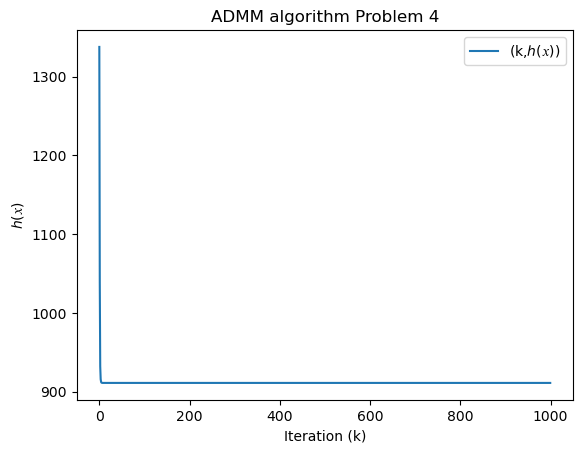

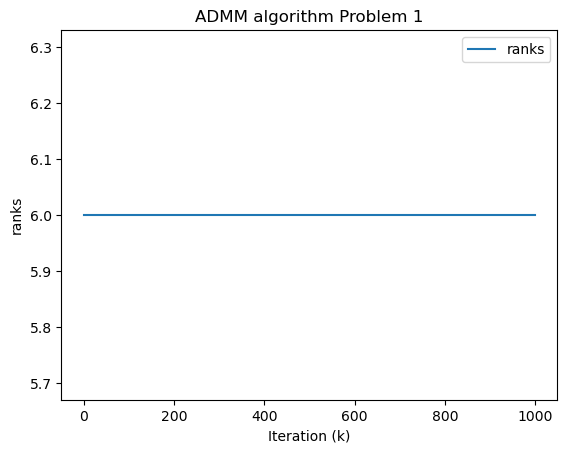

In [74]:
lamda = 0.9
mu = 0.001
hh,ranks,x_,times= ADMM2(Y,Z, B,omega,omegac, lamda,mu,ITER = 1000)
print("*" * 30)
print("ADMM algorithm ")
print("elapsed_time: ",times,"seconds")
print("ℎ(𝑥0) = ",hh[0])
print("ℎ(𝑥*) = ",hh[-1])
print("*" * 30)
plt.plot(hh, label='(k,ℎ($𝑥$))')
plt.title("ADMM algorithm Problem 4")
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()


plt.plot(ranks, label='ranks')
plt.title("ADMM algorithm Problem 1")
plt.xlabel('Iteration (k)')
plt.ylabel('ranks')
plt.legend()
plt.show()